# Hypothesis tests

According to the survey, 75% of restaurant workers say they experience significant stress at work that negatively affects their personal lives. A large restaurant chain polls 100 of its employees to find out if the stress level of workers in their restaurants is different from the average. 67 out of 100 workers reported high levels of stress.

Count the significance level achieved, round the answer to four digits after the decimal point.

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
n = 100
prob = 0.75
F_H0 = stats.binom(n, prob)

<BarContainer object of 101 artists>

(60.0, 90.0)

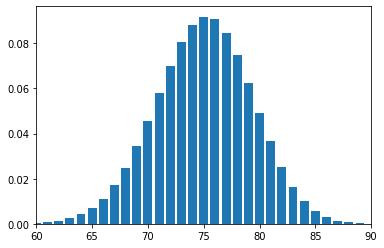

In [3]:
x = np.linspace(0,100,101)

plt.bar(x, F_H0.pmf(x), align = 'center')
plt.xlim(60, 90) 
plt.show()

In [4]:
print('p-value: %.4f' % stats.binom_test(67, 100, prob))

p-value: 0.0822


<b>

Imagine now that in another restaurant chain, only 22 out of 50 employees are experiencing significant stress. The hypothesis that 22/50 corresponds to 75% of the entire population is rejected by the method that you used in the previous task. How can this be explained? Select all possible options.

In [5]:
print('p-value: %.10f' % stats.binom_test(22, 50, prob))

p-value: 0.0000034831


<b>

The Wage Tract is a nature reserve in Tom County, Georgia, USA, in which trees have not been affected by human activity since the first settlers. For the reserve area 200x200 m in size, there is information about the coordinates of the pines (sn is the coordinate in the north-south direction, we are in the west-east direction, both from 0 to 200).

pines.txt

Let's check whether the spatial distribution of pines can be considered uniform, or whether they grow in clusters.

Download the data, divide the area into 5x5 identical squares of 40x40 m in size, count the number of pines in each square (to get the same result as ours, use the scipy.stats.binned_statistic_2d function).

If pines really grow evenly, what is the average expected number of pines in each square? The correct answer is two digits after the decimal point.

In [0]:
pines_data = pd.read_table('pines.txt')
pines_data.describe()
pines_data.head()

sn          we
count  584.000000  584.000000
mean    98.735274  113.829281
std     56.523154   49.810725
min      0.000000    0.000000
25%     52.050000   79.125000
50%    101.450000  121.900000
75%    149.400000  149.725000
max    200.000000  200.000000

sn    we
0  200.0   8.8
1  199.3  10.0
2  193.6  22.4
3  167.7  35.6
4  183.9  45.4

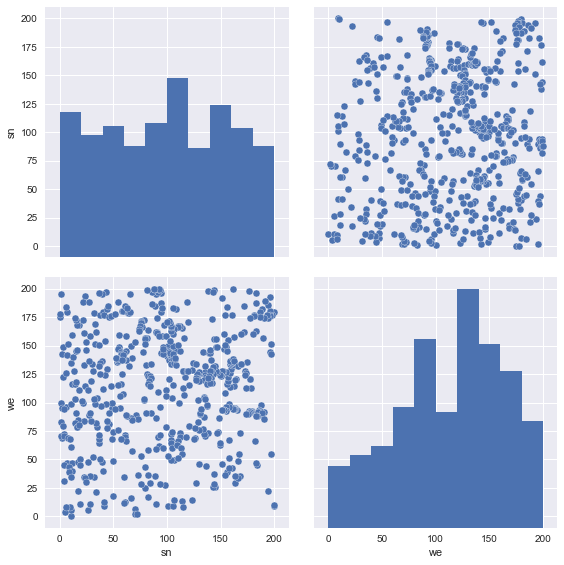

In [0]:
sns.pairplot(pines_data, size=4);

In [0]:
sn_num, we_num = 5, 5

trees_bins = stats.binned_statistic_2d(pines_data.sn, pines_data.we, None, statistic='count', bins=[sn_num, we_num])

trees_squares_num = trees_bins.statistic
trees_squares_num
trees_bins.x_edge
trees_bins.y_edge

array([[ 18.,  26.,  29.,  25.,  20.],
       [ 14.,  12.,  22.,  34.,  25.],
       [ 12.,  24.,  15.,  50.,  37.],
       [  8.,  19.,  31.,  50.,   7.],
       [  7.,   8.,  37.,  27.,  27.]])

array([   0.,   40.,   80.,  120.,  160.,  200.])

array([   0.,   40.,   80.,  120.,  160.,  200.])

In [0]:
mean_trees_num = np.sum(trees_squares_num) / 25
print(mean_trees_num)

23.36


<b>

To compare the distribution of pines with a uniform, calculate the value of the chi-square statistics for the obtained 5x5 squares. Round the answer to two digits after the decimal point.

In [0]:
stats.chisquare(trees_squares_num.flatten(), ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.5746697749672791e-20)